In [1]:
!pip install tensorflow scipy

In [2]:
# Import

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

Generate data

In [3]:
N = 1500
t = np.arange(0, N)

In [4]:
t

array([   0,    1,    2, ..., 1497, 1498, 1499])

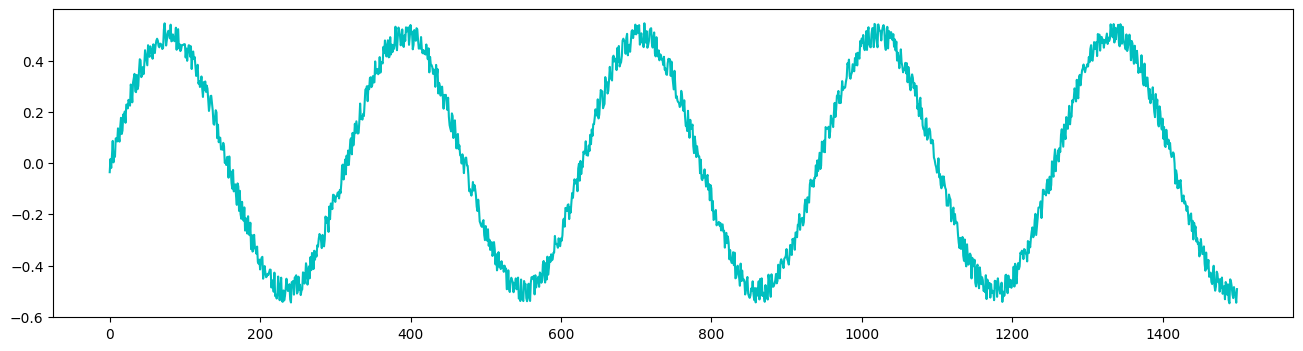

In [5]:
# Sine Signal

data_sine = np.sin(t * 0.02)/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_sine, 'c')
plt.show()

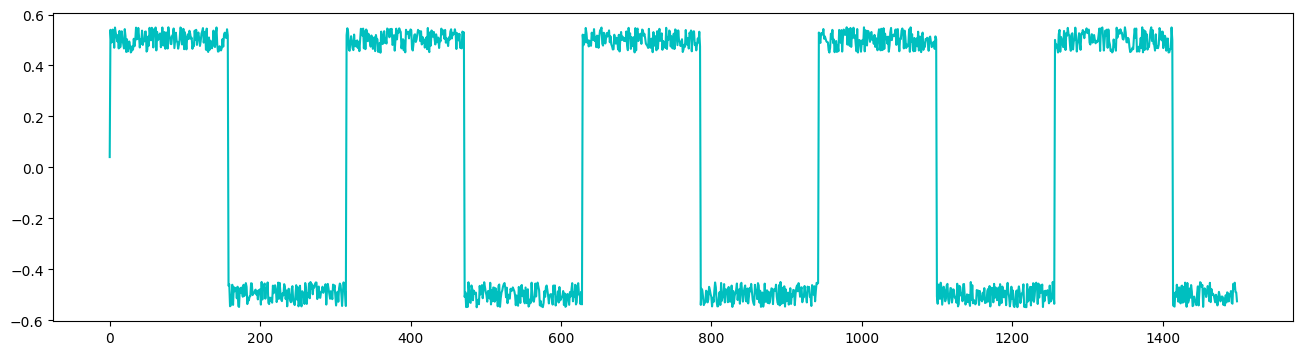

In [6]:
# Square Signal

data_square = np.sign(np.sin(t * 0.02))/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_square, 'c')
plt.show()

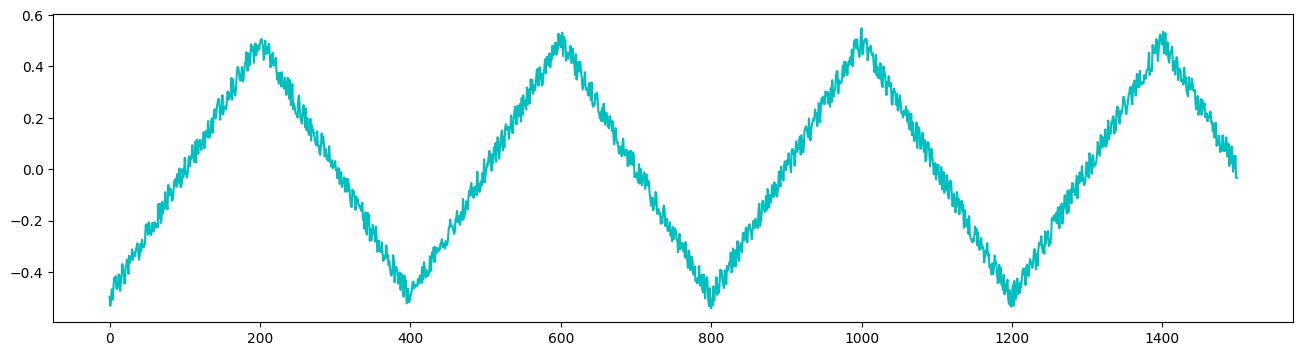

In [7]:
# Triangle Signal

P = 200
A = 2
data_triangle = ((A/P) * (P - np.abs(t % (2*P) - P)) - 1) / 2 + np.random.uniform(-0.05, 0.05, N)

plt.figure(figsize=(16, 4))
plt.plot(data_triangle, 'c')
plt.show()

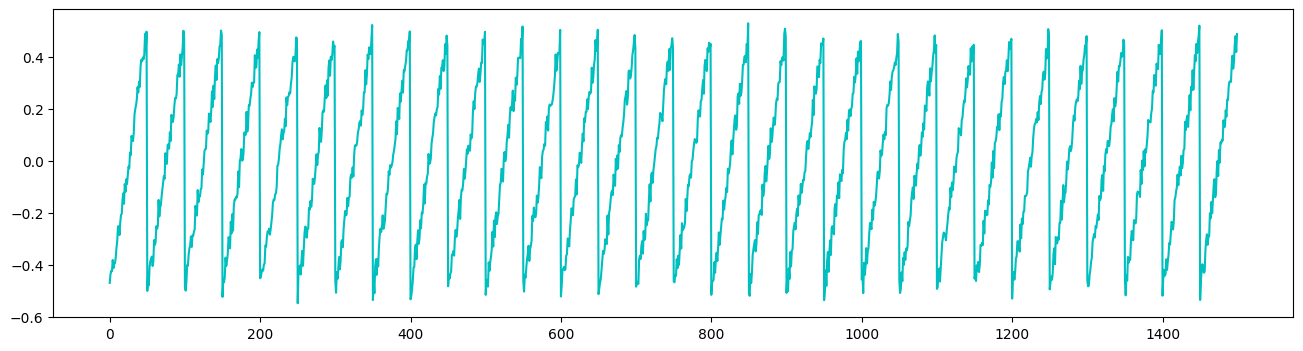

In [8]:
# sawtooth signal
from scipy import signal
sawtooth_signal = signal.sawtooth(2 * np.pi * 0.02 * t) / 2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(sawtooth_signal, 'c')
plt.show()


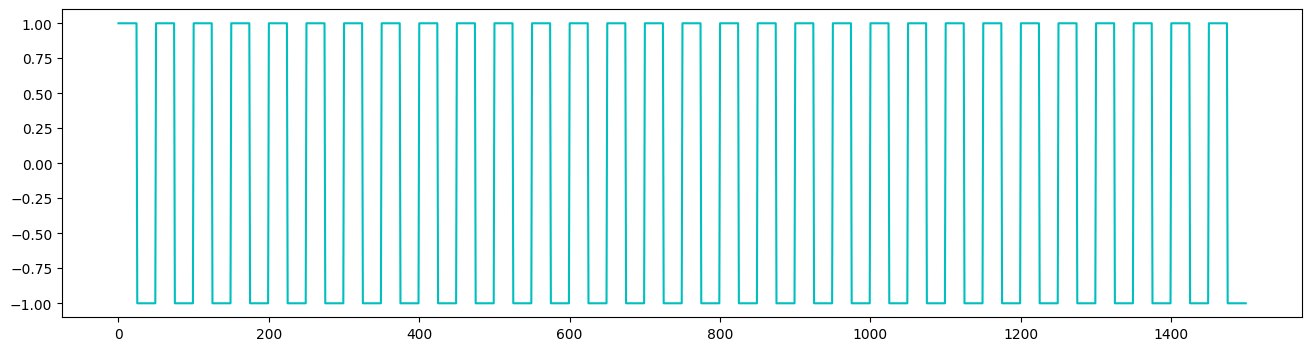

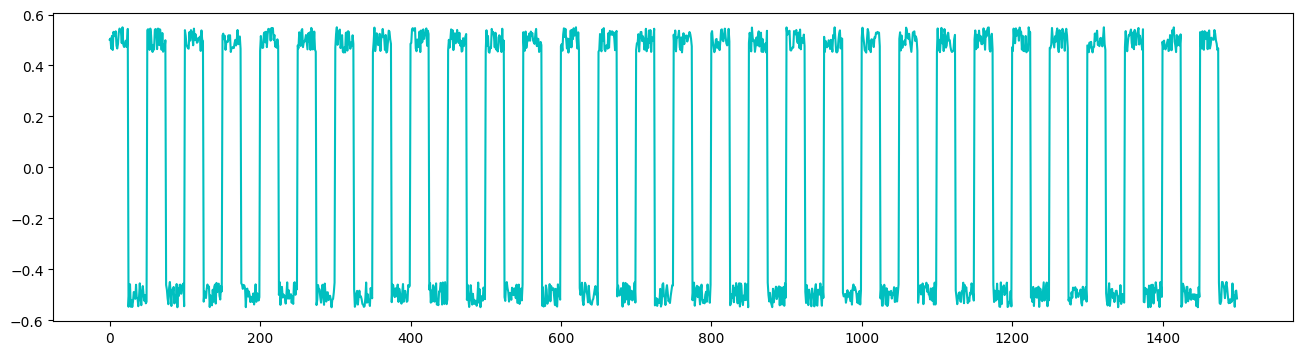

In [9]:
# pulse/rectangular signal
data_pulse = signal.square(2 * np.pi * 0.02 * t) / 2 + np.random.uniform(-0.05, 0.05, N)
amp = 1
freq = 0.02
duty_cycle = 0.5
data = amp * ((freq * t % 1) < duty_cycle).astype(float) * 2 - 1
plt.figure(figsize=(16, 4))
plt.plot(data, 'c')
plt.show()
plt.figure(figsize=(16, 4))
plt.plot(data_pulse, 'c')
plt.show()
# Combine all signals into a dataset

In [10]:
import scipy.signal as signal

def generate_wave(label, length=256):
    t = np.linspace(0, 1, length)
    if label == 'sine':   return np.sin(2 * np.pi * 3 * t + np.random.uniform(0, 2*np.pi))
    if label == 'cosine': return np.cos(2 * np.pi * 3 * t + np.random.uniform(0, 2*np.pi))
    if label == 'triangle': return signal.sawtooth(2 * np.pi * 2 * t, 0.5)
    if label == 'square':   return signal.square(2 * np.pi * 5 * t)
    if label == 'sawtooth': return signal.sawtooth(2 * np.pi * 4 * t)
    if label == 'cosmic':   return np.sin(2*np.pi*2*t) + 0.5*np.sin(2*np.pi*7*t) + 0.3*np.random.randn(length)  # example

In [11]:
# Sampeling and Convert Signal to Dataset

def convertSignalToDataset(signal, step, label):
  X = []
  Y = []

  for i in range(len(signal) - step):
    j = i + step
    X.append(signal[i:j])
    Y.append(label)

  return np.array(X), np.array(Y)

In [12]:
# Step is Hyperparameter

X_sine, Y_sine = convertSignalToDataset(data_sine, 40, 0)
X_square, Y_square = convertSignalToDataset(data_square, 40, 1)
X_triangle, Y_triangle = convertSignalToDataset(data_triangle, 40, 2)

In [13]:
X_sine.shape, Y_sine.shape

((1460, 40), (1460,))

In [14]:
X = np.concatenate((X_sine, X_square, X_triangle), axis = 0)
Y = np.concatenate((Y_sine, Y_square, Y_triangle), axis = 0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [15]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train.shape, X_test.shape

((3504, 40, 1), (876, 40, 1))

### Define Model, Fit and Compile

In [16]:
model = tf.keras.models.Sequential([
          layers.SimpleRNN(units=64, input_shape=(None, 1)),
          layers.Dense(3, activation="softmax")
])

c:\Users\jayes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [18]:
model.fit(X_train, Y_train, epochs=100, batch_size=16)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5702 - loss: 0.8785
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6530 - loss: 0.7402
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7129 - loss: 0.6470
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7055 - loss: 0.6545
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7323 - loss: 0.6011
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7149 - loss: 0.6509
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7021 - loss: 0.6736
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7312 - loss: 0.6025
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7420 - loss: 0.5909
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7480 - loss: 0.5667
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7617 - loss: 0.5423
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

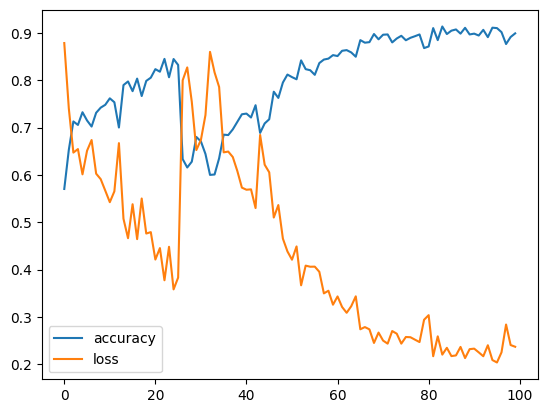

In [19]:
history = pd.DataFrame(model.history.history)
history.plot()

### Evaluate and Inference

In [20]:
# Evaluate

model.evaluate(X_test, Y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8710 - loss: 0.3124


[0.3123509883880615, 0.871004581451416]

In [21]:
# Inference on Sine Signal

N = 40
t = np.arange(0, N)

x = np.sin(t * 0.02)/2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = np.argmax(model.predict(x))
print("Result for Sin Signal: ", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Result for Sin Signal:  0


In [22]:
# Inference on Sequare Signal

N = 40
t = np.arange(0, N)

x = np.sign(np.sin(t * 0.02))/2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = np.argmax(model.predict(x))
print("Result for Sequare Signal: ", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Result for Sequare Signal:  0


In [23]:
# Inference on Triangle Signal

N = 40
t = np.arange(0, N)

x = ((A/P) * (P - np.abs(t % (2*P) - P)) - 1) / 2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = np.argmax(model.predict(x))
print("Result for Triangle Signal: ", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Result for Triangle Signal:  0


In [27]:
# select a segment of length N and reshape to (batch, timesteps, features)
x = data_triangle[:N].reshape(1, N, 1)
result = np.argmax(model.predict(x))
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
0
